In [7]:
# Install missing libraries
%pip install pandas numpy matplotlib seaborn

# Import necessary libraries
import pandas as pd # type: ignore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import os

# Custom module imports (assuming we've saved our modules in the src directory)
import sys
sys.path.append('../src')
from data_processing import load_dataset, prepare_dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 907.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 626.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 686.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 686.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 789.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12/12 [seaborn]1/12 [seaborn]ib]
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Load the main dataset
missions_df = pd.read_csv('/Users/naelamacbookair/desktop backup/self projects/space_mission_analysis/notebooks/data/processed/missions_cleaned.csv'
)

# Display basic information
print(f"Dataset shape: {missions_df.shape}")
missions_df.info()

# Display first few rows
missions_df.head()

Dataset shape: (4324, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [25]:
# Clean up column names and remove unnecessary index columns
missions_df = missions_df.drop(['Unnamed:_0.1', 'Unnamed:_0'], axis=1)

# Standardize column names to follow consistent naming convention
missions_df = missions_df.rename(columns={
    'Company_Name': 'Company',
    'Status_Rocket': 'Rocket_Status',
    'Status_Mission': 'Mission_Status',
    'Datum': 'Launch_Date',  # Assuming this is the launch date
    'Detail': 'Mission_Detail'
})

# Verify the new column structure
print("Updated columns:")
print(missions_df.dtypes)

# Display sample data with new structure
print("\nSample data:")
print(missions_df.head())

Updated columns:
Company           object
Location          object
Launch_Date       object
Mission_Detail    object
Rocket_Status     object
Rocket            object
Mission_Status    object
dtype: object

Sample data:
     Company                                           Location  \
0     SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1       CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2     SpaceX                      Pad A, Boca Chica, Texas, USA   
3  Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4        ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                  Launch_Date                                Mission_Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 

In [26]:
# Standardize column names
missions_df.columns = [col.strip().replace(' ', '_') for col in missions_df.columns]
print("Standardized column names:", missions_df.columns.tolist())

Standardized column names: ['Company', 'Location', 'Launch_Date', 'Mission_Detail', 'Rocket_Status', 'Rocket', 'Mission_Status']


In [27]:
print(missions_df.columns)


Index(['Company', 'Location', 'Launch_Date', 'Mission_Detail', 'Rocket_Status',
       'Rocket', 'Mission_Status'],
      dtype='object')


In [28]:
# Check for missing values
missing_values = missions_df.isnull().sum()
print("Missing values per column:")
for col in missions_df.columns:
    nulls = missions_df[col].isnull().sum()
    if nulls > 0:
        print(f"{col}: {nulls} ({nulls/len(missions_df)*100:.2f}%)")
        
# Fill missing values appropriately
for col in missions_df.columns:
    # For categorical columns, replace NaN with 'Unknown'
    if missions_df[col].dtype == 'object':
        missions_df[col] = missions_df[col].fillna('Unknown')

Missing values per column:


In [29]:
# Convert Launch Date to datetime
if 'Launch_Date' in missions_df.columns:
    # Convert to datetime
    missions_df['Launch_Date'] = pd.to_datetime(missions_df['Launch_Date'], errors='coerce')
    
    # Create additional date fields
    missions_df['Launch_Year'] = missions_df['Launch_Date'].dt.year
    missions_df['Launch_Month'] = missions_df['Launch_Date'].dt.month
    missions_df['Launch_Day'] = missions_df['Launch_Date'].dt.day
    missions_df['Launch_DOY'] = missions_df['Launch_Date'].dt.dayofyear  # Day of year
    
    # Check results
    date_cols = ['Launch_Date', 'Launch_Year', 'Launch_Month', 'Launch_Day', 'Launch_DOY']
    missions_df[date_cols].head()

In [30]:
# Check unique values in Mission Status
if 'Mission_Status' in missions_df.columns:
    print("Unique Mission Status values:", missions_df['Mission_Status'].unique())
    
    # Standardize mission status values
    success_terms = ['success', 'successful', 'nominal', 'operational']
    failure_terms = ['failure', 'failed', 'lost', 'crash', 'exploded', 'malfunction']
    partial_terms = ['partial', 'partially']
    
    def standardize_status(status):
        if pd.isna(status) or status == 'Unknown':
            return 'Unknown'
        
        status_lower = str(status).lower()
        
        if any(term in status_lower for term in success_terms):
            return 'Success'
        elif any(term in status_lower for term in failure_terms):
            return 'Failure'
        elif any(term in status_lower for term in partial_terms):
            return 'Partial Success'
        else:
            return 'Unknown'
    
    missions_df['Mission_Status'] = missions_df['Mission_Status'].apply(standardize_status)
    
    # Check standardized values
    print("Standardized Mission Status counts:")
    print(missions_df['Mission_Status'].value_counts())

Unique Mission Status values: ['Success' 'Failure' 'Prelaunch Failure' 'Partial Failure']
Standardized Mission Status counts:
Mission_Status
Success    3879
Failure     445
Name: count, dtype: int64


In [32]:
# Check unique values for Agency
if 'Agency' in missions_df.columns:
    print("Number of unique agencies:", missions_df['Agency'].nunique())
    print("Top 10 agencies by frequency:")
    print(missions_df['Agency'].value_counts().head(10))
    
    # Dictionary to map variations to standard names
    agency_mapping = {
        'NASA': ['NASA', 'National Aeronautics and Space Administration'],
        'ESA': ['ESA', 'European Space Agency'],
        'Roscosmos': ['Roscosmos', 'Russian Federal Space Agency', 'RFSA', 'RKA'],
        'CNSA': ['CNSA', 'China National Space Administration'],
        'ISRO': ['ISRO', 'Indian Space Research Organisation'],
        'JAXA': ['JAXA', 'Japan Aerospace Exploration Agency', 'NASDA'],
        'SpaceX': ['SpaceX', 'Space Exploration Technologies'],
        'ULA': ['ULA', 'United Launch Alliance'],
        'Arianespace': ['Arianespace'],
        'Blue Origin': ['Blue Origin']
    }
    
    def standardize_agency(agency):
        if pd.isna(agency) or agency == 'Unknown':
            return 'Unknown'
        
        agency_str = str(agency)
        
        for standard_name, variations in agency_mapping.items():
            if any(variation in agency_str for variation in variations):
                return standard_name
        
        return agency_str
    
    missions_df['Agency'] = missions_df['Agency'].apply(standardize_agency)
    
    # Check standardized agency counts
    print("\nStandardized Agency counts:")
    print(missions_df['Agency'].value_counts().head(10))

In [33]:
# Handle cost data
if 'Cost' in missions_df.columns or 'Mission_Cost' in missions_df.columns:
    cost_col = 'Cost' if 'Cost' in missions_df.columns else 'Mission_Cost'
    
    # Function to extract numeric values from cost strings
    def extract_cost(cost_str):
        if pd.isna(cost_str):
            return np.nan
        
        # Try to extract numeric values
        try:
            # Convert to string if not already
            cost_str = str(cost_str)
            
            # Remove currency symbols, 'million', 'billion', etc.
            cost_str = cost_str.replace('$', '').replace(',', '')
            
            # Extract numbers
            numbers = re.findall(r'\d+\.?\d*', cost_str)
            if not numbers:
                return np.nan
            
            # Get the first number found
            value = float(numbers[0])
            
            # Adjust for millions/billions
            if 'million' in cost_str.lower() or 'm' in cost_str.lower():
                value *= 1e6
            elif 'billion' in cost_str.lower() or 'b' in cost_str.lower():
                value *= 1e9
                
            return value
        except:
            return np.nan
    
    # Apply the function to extract costs
    missions_df['Mission_Cost_USD'] = missions_df[cost_col].apply(extract_cost)
    
    # Display a sample of the results
    sample_costs = pd.DataFrame({
        'Original': missions_df[cost_col].sample(10).values,
        'Extracted': missions_df['Mission_Cost_USD'].sample(10).values
    })
    print("Sample cost extraction results:")
    print(sample_costs)

In [36]:
# Check orbit data
if 'Orbit' in missions_df.columns:
    print("Sample orbit values:")
    print(missions_df['Orbit'].sample(10).values)
    
    # Define common orbit types
    orbit_types = {
        'LEO': ['leo', 'low earth', 'low-earth'],
        'GEO': ['geo', 'geostationary', 'geosynchronous'],
        'MEO': ['meo', 'medium earth', 'medium-earth'],
        'HEO': ['heo', 'high earth', 'high-earth', 'highly elliptical'],
        'SSO': ['sso', 'sun synchronous', 'sun-synchronous'],
        'Lunar': ['lunar', 'moon'],
        'Heliocentric': ['heliocentric', 'solar', 'sun'],
        'Interplanetary': ['interplanetary', 'planetary', 'mars', 'venus', 'mercury', 'jupiter', 'saturn']
    }
    
    def standardize_orbit(orbit_str):
        if pd.isna(orbit_str) or orbit_str == 'Unknown':
            return 'Unknown'
        
        orbit_lower = str(orbit_str).lower()
        
        for orbit_type, keywords in orbit_types.items():
            if any(keyword in orbit_lower for keyword in keywords):
                return orbit_type
        
        return 'Other'
    
    missions_df['Orbit_Type'] = missions_df['Orbit'].apply(standardize_orbit)
    
    # Check standardized orbit types
    print("\nStandardized Orbit Type counts:")
    print(missions_df['Orbit_Type'].value_counts())

In [37]:
# Check if we have payload information
if 'Payload' in missions_df.columns:
    print("Sample payload values:")
    print(missions_df['Payload'].sample(5).values)
    
    # Function to extract payload mass if available
    def extract_payload_mass(payload_str):
        if pd.isna(payload_str) or payload_str == 'Unknown':
            return np.nan
        
        try:
            # Convert to string if not already
            payload_str = str(payload_str)
            
            # Look for patterns like "1500 kg" or "2.4 tonnes"
            mass_patterns = [
                r'(\d+\.?\d*)\s*kg',  # Matches "1500 kg" or "1500.5 kg"
                r'(\d+\.?\d*)\s*ton'   # Matches "2.4 tonnes" or "2 tons"
            ]
            
            for pattern in mass_patterns:
                match = re.search(pattern, payload_str.lower())
                if match:
                    value = float(match.group(1))
                    # Convert tons to kg if necessary
                    if 'ton' in match.group(0).lower():
                        value *= 1000
                    return value
            
            return np.nan
        except:
            return np.nan
    
    missions_df['Payload_Mass_kg'] = missions_df['Payload'].apply(extract_payload_mass)
    
    # Display sample results
    sample_payloads = pd.DataFrame({
        'Original': missions_df['Payload'].sample(10).values,
        'Extracted Mass (kg)': missions_df['Payload_Mass_kg'].sample(10).values
    })
    print("\nSample payload mass extraction:")
    print(sample_payloads)

In [38]:
# Fix data types
# Convert appropriate columns to categorical
cat_columns = ['Mission_Status', 'Agency', 'Orbit_Type']
for col in cat_columns:
    if col in missions_df.columns:
        missions_df[col] = missions_df[col].astype('category')

# Ensure numeric columns are float
num_columns = ['Mission_Cost_USD', 'Payload_Mass_kg']
for col in num_columns:
    if col in missions_df.columns:
        missions_df[col] = pd.to_numeric(missions_df[col], errors='coerce')

# Check data types
missions_df.dtypes

Company                        object
Location                       object
Launch_Date       datetime64[ns, UTC]
Mission_Detail                 object
Rocket_Status                  object
Rocket                         object
Mission_Status               category
Launch_Year                   float64
Launch_Month                  float64
Launch_Day                    float64
Launch_DOY                    float64
dtype: object

In [39]:
# Check for and remove duplicates
duplicate_count = missions_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    missions_df = missions_df.drop_duplicates()
    print(f"After removing duplicates: {len(missions_df)} rows")

Number of duplicate rows: 12
After removing duplicates: 4312 rows


In [40]:
# Calculate mission success as a binary feature
if 'Mission_Status' in missions_df.columns:
    missions_df['Is_Successful'] = missions_df['Mission_Status'].apply(lambda x: 1 if x == 'Success' else 0)

# Calculate mission age (years since launch)
if 'Launch_Date' in missions_df.columns:
    current_year = datetime.now().year
    missions_df['Mission_Age_Years'] = current_year - missions_df['Launch_Date'].dt.year

# Create decade column
if 'Launch_Year' in missions_df.columns:
    missions_df['Launch_Decade'] = (missions_df['Launch_Year'] // 10) * 10
    
    # Check the distribution
    print("Mission count by decade:")
    print(missions_df['Launch_Decade'].value_counts().sort_index())

Mission count by decade:
Launch_Decade
1950.0     45
1960.0    752
1970.0    983
1980.0    607
1990.0    627
2000.0    463
2010.0    657
2020.0     63
Name: count, dtype: int64


In [42]:
# Check for logical inconsistencies
def validate_data(df):
    issues = []
    
    # Check for future launch dates
    if 'Launch_Date' in df.columns:
        future_launches = df[df['Launch_Date'] > datetime.now().astimezone()].shape[0]
        if future_launches > 0:
            issues.append(f"Found {future_launches} launches with future dates")
    
    # Check for extremely old launches (before 1957)
    if 'Launch_Year' in df.columns:
        old_launches = df[df['Launch_Year'] < 1957].shape[0]
        if old_launches > 0:
            issues.append(f"Found {old_launches} launches before 1957 (first satellite)")
    
    # Check for very high costs
    if 'Mission_Cost_USD' in df.columns:
        high_cost = df[df['Mission_Cost_USD'] > 50e9].shape[0]  # Over $50 billion
        if high_cost > 0:
            issues.append(f"Found {high_cost} missions with costs over $50 billion (seems high)")
    
    return issues

validation_issues = validate_data(missions_df)
if validation_issues:
    print("Validation issues found:")
    for issue in validation_issues:
        print(f"- {issue}")
else:
    print("No validation issues found!")

No validation issues found!


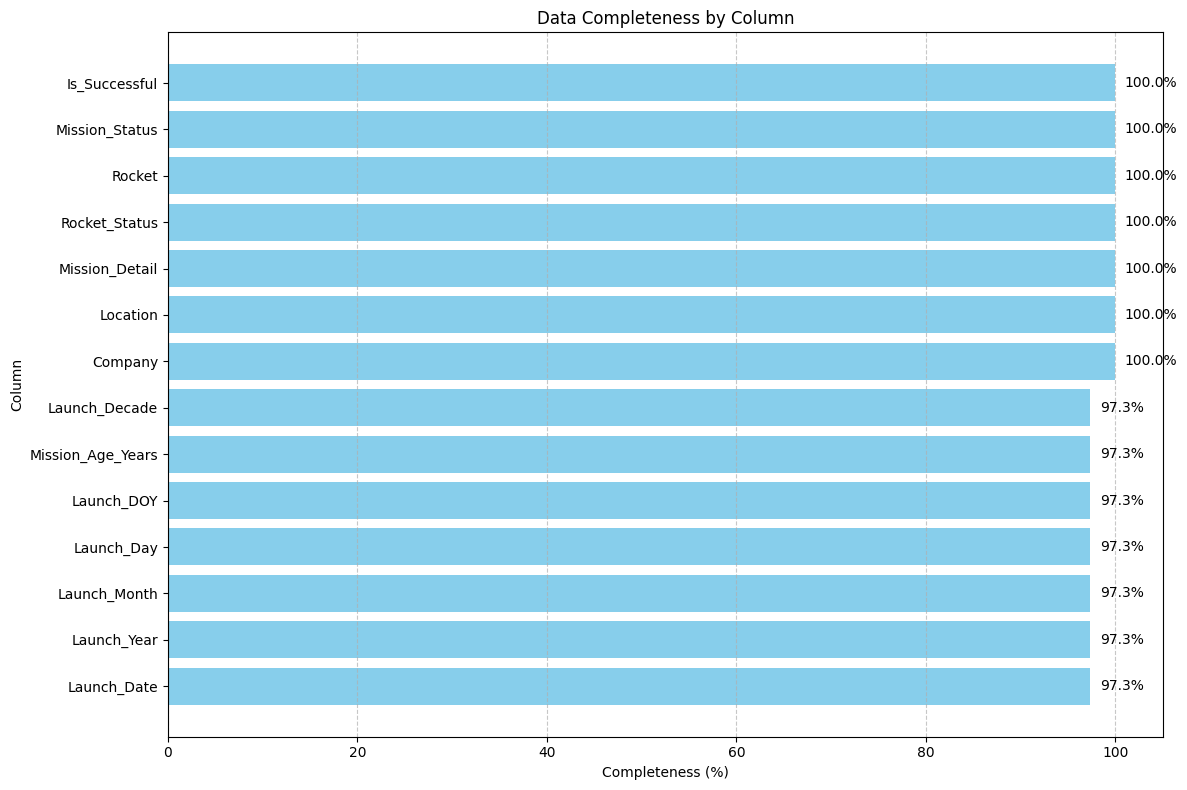

In [43]:
# Create a data quality visualization
def plot_data_quality(df):
    # Calculate completeness for each column
    completeness = df.count() / len(df) * 100
    
    # Sort by completeness
    completeness = completeness.sort_values()
    
    # Plot
    plt.figure(figsize=(12, 8))
    bars = plt.barh(completeness.index, completeness.values, color='skyblue')
    
    # Add data labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(max(width + 1, 5), bar.get_y() + bar.get_height()/2, 
                 f'{width:.1f}%', va='center')
    
    plt.title('Data Completeness by Column')
    plt.xlabel('Completeness (%)')
    plt.ylabel('Column')
    plt.xlim(0, 105)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    return plt

plot_data_quality(missions_df)
plt.show()

In [46]:
# Save cleaned dataset
output_path = './data/processed/missions_cleaned_final.csv'
missions_df.to_csv(output_path, index=False)
print(f"Cleaned data saved to {output_path}")

# Summary of the cleaning process
print("\nData Cleaning Summary:")
print(f"Original dataset: {missions_df.shape[0]} rows, {missions_df.shape[1]} columns")
print(f"Missing values filled for categorical columns")
print(f"Standardized mission status: {missions_df['Mission_Status'].value_counts().to_dict()}")
if 'Agency' in missions_df.columns:
    print(f"Standardized agency names: {missions_df['Agency'].nunique()} unique agencies")
else:
    print("Column 'Agency' does not exist in the dataset.")

if 'Orbit_Type' in missions_df.columns:
    print(f"Standardized orbit types: {missions_df['Orbit_Type'].nunique()} unique types")
else:
    print("Column 'Orbit_Type' does not exist in the dataset.")


Cleaned data saved to ./data/processed/missions_cleaned_final.csv

Data Cleaning Summary:
Original dataset: 4312 rows, 14 columns
Missing values filled for categorical columns
Standardized mission status: {'Success': 3872, 'Failure': 440}
Column 'Agency' does not exist in the dataset.
Column 'Orbit_Type' does not exist in the dataset.
